In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train=pd.read_csv('/kaggle/input/cipla-input/train.csv')

In [3]:
train.info() # metrics 'r2_score'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [4]:
train.isna().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [5]:
train.head(10)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
5,C-17688,Polly Crumpler,F,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,...,684.12,1,Inactive,491,1234.92,2,Rural,1,43146.82,22382.57
6,C-23855,Nathalie Olivier,M,43,2361.56,Low,Working,Laborers,Semi-Urban,152561.34,...,637.29,0,Unpossessed,227,2361.56,1,Semi-Urban,1,221050.80,0.00
7,C-11006,Clarinda Montana,F,45,NaN,Low,State servant,Managers,Semi-Urban,240311.77,...,812.26,0,Active,314,NaN,2,Urban,1,401040.70,168218.24
8,C-26934,Kenny Ankrom,F,38,1296.07,Low,Working,Cooking staff,Rural,35141.99,...,705.29,1,Active,241,1296.07,4,Rural,1,54903.44,22842.29
9,C-24944,Barbie Goetsch,M,18,1546.17,Low,Working,Laborers,Rural,42091.29,...,613.24,0,Unpossessed,883,1546.17,2,Urban,1,67993.43,0.00


In [6]:
#income usd and property age are same---- drop either

In [7]:
pd.value_counts(train['Income Stability'],dropna=False)

Low     25751
High     2566
NaN      1683
Name: Income Stability, dtype: int64

In [8]:
train['Income Stability']=train['Income Stability'].fillna(train['Income Stability'].mode()[0]) #filled with mode--

In [9]:
# type of employment drop--

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Current Loan Expenses (USD)', ylabel='Density'>

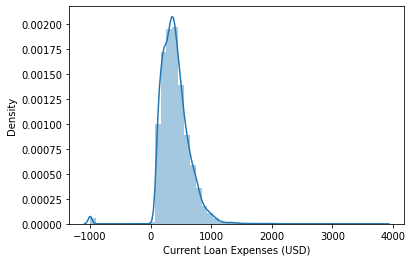

In [10]:
sns.distplot(train['Current Loan Expenses (USD)'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Current Loan Expenses (USD)'>

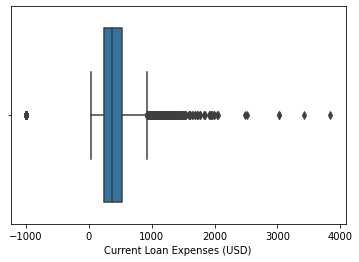

In [11]:
sns.boxplot(train['Current Loan Expenses (USD)'])

In [12]:
train['Current Loan Expenses (USD)'][train['Current Loan Expenses (USD)']<0]=np.nan
train['Current Loan Expenses (USD)']=train['Current Loan Expenses (USD)'].fillna(train['Current Loan Expenses (USD)'].median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
pd.value_counts(train['Dependents'],dropna=False)

2.0     13108
3.0      5719
1.0      5544
4.0      2704
NaN      2493
5.0       372
6.0        50
7.0         7
8.0         1
14.0        1
10.0        1
Name: Dependents, dtype: int64

In [14]:
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

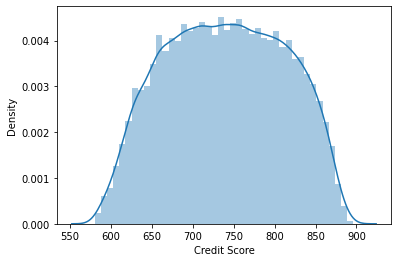

In [15]:
sns.distplot(train['Credit Score'])

In [16]:
train['Credit Score']=train['Credit Score'].fillna(train['Credit Score'].mean())

In [17]:
pd.value_counts(train['Has Active Credit Card'],dropna=False)

Active         9771
Inactive       9466
Unpossessed    9197
NaN            1566
Name: Has Active Credit Card, dtype: int64

In [18]:
train['Has Active Credit Card']=train['Has Active Credit Card'].fillna(train['Has Active Credit Card'].mode()[0])

In [19]:
pd.value_counts(train['Has Active Credit Card'],dropna=False)

Active         11337
Inactive        9466
Unpossessed     9197
Name: Has Active Credit Card, dtype: int64

In [20]:
pd.value_counts(train['Property Location'],dropna=False)

Semi-Urban    10387
Rural         10041
Urban          9216
NaN             356
Name: Property Location, dtype: int64

In [21]:
train['Property Location']=train['Property Location'].fillna(train['Property Location'].mode()[0])

In [22]:
pd.value_counts(train['Loan Sanction Amount (USD)'])

 0.00        7865
-999.00       338
 28937.45       3
 27767.18       2
 47136.42       2
             ... 
 39223.54       1
 45498.37       1
 64906.87       1
 57763.88       1
 51336.08       1
Name: Loan Sanction Amount (USD), Length: 21450, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Density'>

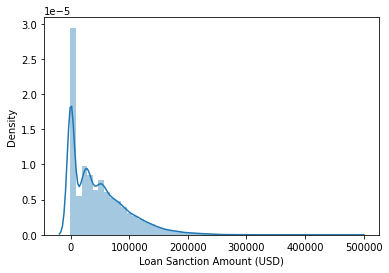

In [23]:
sns.distplot(train['Loan Sanction Amount (USD)'])

In [24]:
train['Loan Sanction Amount (USD)'][train['Loan Sanction Amount (USD)']<0]=np.nan
train['Loan Sanction Amount (USD)']=train['Loan Sanction Amount (USD)'].fillna(train['Loan Sanction Amount (USD)'].median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
pd.value_counts(train['Co-Applicant'])

 1      25516
 0       4316
-999      168
Name: Co-Applicant, dtype: int64

In [27]:
train['Co-Applicant'][train['Co-Applicant']<0]=np.nan
train['Co-Applicant']=train['Co-Applicant'].fillna(train['Co-Applicant'].mode()[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
pd.value_counts(train['Property Price'])

-999.00       352
 57914.08       2
 37110.63       2
 28287.20       2
 53812.78       2
             ... 
 42261.25       1
 55008.78       1
 133074.16      1
 152025.17      1
 44721.76       1
Name: Property Price, Length: 29632, dtype: int64

In [29]:
train['Property Price'][train['Property Price']<0]=np.nan

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Property Price', ylabel='Density'>

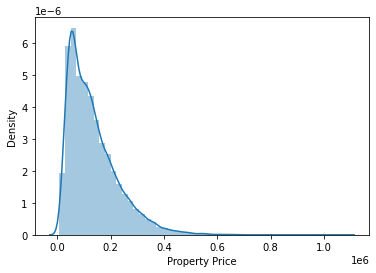

In [30]:
sns.distplot(train['Property Price'])

In [31]:
train['Property Price']=train['Property Price'].fillna(train['Property Price'].median())

In [37]:
train['Income (USD)']=train['Income (USD)'].fillna(train['Income (USD)'].median())

In [38]:
train.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [40]:
train.drop(['Customer ID', 'Name', 'Gender','Property Age','Dependents', 'Property ID','Type of Employment','Profession'],axis=1,inplace=True)

In [41]:
train.head()

,Age,Income (USD),Income Stability,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,No. of Defaults,Has Active Credit Card,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,56,1933.050,Low,Semi-Urban,72809.58,241.08,N,N,809.44,0,Active,4,Rural,1.0,119933.46,54607.18
1,32,4952.910,Low,Semi-Urban,46837.47,495.81,N,Y,780.40,0,Unpossessed,2,Rural,1.0,54791.00,37469.98
2,65,988.190,High,Semi-Urban,45593.04,171.95,N,Y,833.15,0,Unpossessed,2,Urban,0.0,72440.58,36474.43
3,65,2222.435,High,Rural,80057.92,298.54,N,Y,832.70,1,Unpossessed,2,Semi-Urban,1.0,121441.51,56040.54
4,31,2614.770,Low,Semi-Urban,113858.89,491.41,N,Y,745.55,1,Active,4,Semi-Urban,1.0,208567.91,74008.28


In [42]:
train.shape

(30000, 16)

In [43]:
train.isna().sum()

Age                            0
Income (USD)                   0
Income Stability               0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [44]:
test=pd.read_csv('/kaggle/input/cipla-input/test.csv')

In [45]:
test=test[train.columns[:-1]]

In [46]:
test

,Age,Income (USD),Income Stability,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,No. of Defaults,Has Active Credit Card,Property Type,Property Location,Co-Applicant,Property Price
0,47,3472.69,Low,Semi-Urban,137088.98,396.72,N,N,799.14,0,Unpossessed,2,Urban,1,236644.5
1,57,1184.84,Low,Rural,104771.59,463.76,Y,Y,833.31,0,Unpossessed,1,Rural,1,142357.3
2,52,1266.27,Low,Semi-Urban,176684.91,493.15,N,Y,627.44,0,Unpossessed,1,Urban,1,300991.24
3,65,1369.72,High,Rural,97009.18,446.15,N,Y,833.20,0,Inactive,1,Semi-Urban,0,125612.1
4,60,1939.23,High,Urban,109980.00,370.10,N,N,NaN,0,NaN,4,Semi-Urban,1,180908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19,1349.60,Low,Semi-Urban,156766.97,500.59,Y,Y,684.32,0,Inactive,4,Semi-Urban,1,212778.0
19996,22,2019.78,Low,Urban,47924.80,243.02,Y,Y,706.34,0,Inactive,4,Urban,1,90816.95
19997,19,2252.03,Low,Semi-Urban,18629.88,101.88,Y,N,656.46,0,Inactive,2,Rural,0,21566.27
19998,21,1845.35,Low,Semi-Urban,95430.73,271.31,N,Y,865.46,0,Unpossessed,1,Semi-Urban,1,120281.17


In [47]:
test.isna().sum()

Age                               0
Income (USD)                    750
Income Stability                813
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [48]:
pd.value_counts(test['Income (USD)'],dropna=False)

NaN        750
2097.78      3
2248.35      3
1720.04      3
1876.05      3
          ... 
2478.40      1
3744.63      1
1628.89      1
2948.91      1
3953.43      1
Name: Income (USD), Length: 18694, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income (USD)', ylabel='Density'>

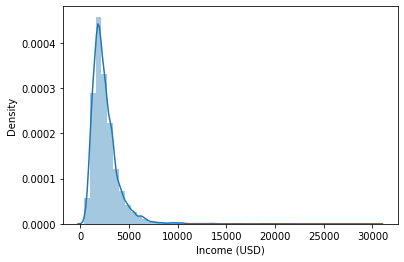

In [49]:
sns.distplot(test['Income (USD)'])

In [50]:
test['Income (USD)']=test['Income (USD)'].fillna(test['Income (USD)'].median())

In [51]:
pd.value_counts(test['Income Stability'],dropna=False)

Low     17501
High     1686
NaN       813
Name: Income Stability, dtype: int64

In [52]:
test['Income Stability']=test['Income Stability'].fillna(test['Income Stability'].mode()[0])

In [53]:
test['Current Loan Expenses (USD)']=test['Current Loan Expenses (USD)'].fillna(test['Current Loan Expenses (USD)'].median())

In [ ]:
#test['Dependents']=test['Dependents'].fillna(method='ffill')

In [ ]:
#pd.value_counts(test['Dependents'],dropna=False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

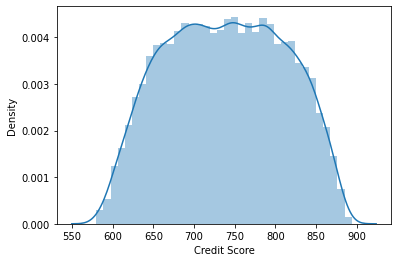

In [55]:
sns.distplot(test['Credit Score'])

In [56]:
test['Credit Score']=test['Credit Score'].fillna(test['Credit Score'].median())

In [57]:
pd.value_counts(test['Has Active Credit Card'],dropna=False)

Active         6418
Inactive       6376
Unpossessed    6130
NaN            1076
Name: Has Active Credit Card, dtype: int64

In [58]:
test['Has Active Credit Card']=test['Has Active Credit Card'].fillna(test['Has Active Credit Card'].mode()[0])

In [59]:
pd.value_counts(test['Has Active Credit Card'],dropna=False)

Active         7494
Inactive       6376
Unpossessed    6130
Name: Has Active Credit Card, dtype: int64

In [60]:
pd.value_counts(test['Property Location'],dropna=False)

Semi-Urban    6839
Rural         6768
Urban         6233
NaN            160
Name: Property Location, dtype: int64

In [61]:
test['Property Location']=test['Property Location'].fillna(test['Property Location'].mode()[0])

In [62]:
pd.value_counts(test['Co-Applicant'])

1    17004
0     2919
?       77
Name: Co-Applicant, dtype: int64

In [63]:
test['Co-Applicant']=test['Co-Applicant'].replace(['?'],[np.nan])

In [64]:
pd.value_counts(test['Co-Applicant'],dropna=False)

1      17004
0       2919
NaN       77
Name: Co-Applicant, dtype: int64

In [65]:
test['Co-Applicant']=test['Co-Applicant'].fillna(test['Co-Applicant'].mode()[0])

In [66]:
pd.value_counts(test['Property Price'],dropna=False)

?            168
110103.62      2
197833.75      2
60060.83       2
77441.22       2
            ... 
407353.91      1
65993.27       1
148651.05      1
172100.32      1
241222.69      1
Name: Property Price, Length: 19824, dtype: int64

In [67]:
test['Property Price']=test['Property Price'].replace(['?'],[np.nan])

In [68]:
test['Property Price']=test['Property Price'].astype(float)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Property Price', ylabel='Density'>

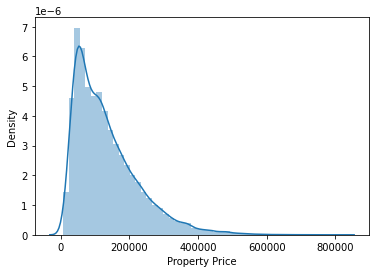

In [69]:
sns.distplot(test['Property Price'])

In [70]:
test['Property Price']=test['Property Price'].fillna(test['Property Price'].median())

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Income (USD)                 30000 non-null  float64
 2   Income Stability             30000 non-null  object 
 3   Location                     30000 non-null  object 
 4   Loan Amount Request (USD)    30000 non-null  float64
 5   Current Loan Expenses (USD)  30000 non-null  float64
 6   Expense Type 1               30000 non-null  object 
 7   Expense Type 2               30000 non-null  object 
 8   Credit Score                 30000 non-null  float64
 9   No. of Defaults              30000 non-null  int64  
 10  Has Active Credit Card       30000 non-null  object 
 11  Property Type                30000 non-null  int64  
 12  Property Location            30000 non-null  object 
 13  Co-Applicant    

In [72]:
for i in train.columns:
    print(i,'-->',pd.unique(train[i]))

Age --> [56 32 65 31 60 43 45 38 18 39 48 61 54 64 41 19 44 24 55 63 23 29 28 49
 30 37 51 27 59 62 21 33 58 25 26 50 46 22 36 53 34 40 35 42 57 47 52 20]
Income (USD) --> [1933.05 4952.91  988.19 ... 1606.88 2417.71 3068.24]
Income Stability --> ['Low' 'High']
Location --> ['Semi-Urban' 'Rural' 'Urban']
Loan Amount Request (USD) --> [ 72809.58  46837.47  45593.04 ...  81410.08 142524.1  156290.54]
Current Loan Expenses (USD) --> [241.08 495.81 171.95 ... 583.11 378.29 693.94]
Expense Type 1 --> ['N' 'Y']
Expense Type 2 --> ['N' 'Y']
Credit Score --> [809.44 780.4  833.15 ... 709.43 869.61 815.44]
No. of Defaults --> [0 1]
Has Active Credit Card --> ['Active' 'Unpossessed' 'Inactive']
Property Type --> [4 2 1 3]
Property Location --> ['Rural' 'Urban' 'Semi-Urban']
Co-Applicant --> [1. 0.]
Property Price --> [119933.46  54791.    72440.58 ... 102108.02 168194.47 194512.6 ]
Loan Sanction Amount (USD) --> [ 54607.18  37469.98  36474.43 ...  61057.56  99766.87 117217.9 ]


In [81]:
df=pd.DataFrame()
for i in train.columns:
    if np.dtype(train[i])=='O':
        x=pd.get_dummies(train[i],prefix=i+'_',drop_first=True)
        df=pd.concat([df,x],axis=1)
    else:
        df=pd.concat([df,train[i]],axis=1)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  30000 non-null  int64  
 1   Income (USD)                         30000 non-null  float64
 2   Income Stability__Low                30000 non-null  uint8  
 3   Location__Semi-Urban                 30000 non-null  uint8  
 4   Location__Urban                      30000 non-null  uint8  
 5   Loan Amount Request (USD)            30000 non-null  float64
 6   Current Loan Expenses (USD)          30000 non-null  float64
 7   Expense Type 1__Y                    30000 non-null  uint8  
 8   Expense Type 2__Y                    30000 non-null  uint8  
 9   Credit Score                         30000 non-null  float64
 10  No. of Defaults                      30000 non-null  int64  
 11  Has Active Credit Card__Inactive 

In [83]:
df.to_csv('train_prep_new.csv',index=False)

In [84]:
np.dtype(test['Co-Applicant'])

dtype('int64')

In [85]:
test['Co-Applicant']=test['Co-Applicant'].astype(float)

In [86]:
df=pd.DataFrame()
for i in test.columns:
    if np.dtype(test[i])=='O':
        x=pd.get_dummies(test[i],prefix=i+'_',drop_first=False)
        df=pd.concat([df,x],axis=1)
    else:
        df=pd.concat([df,test[i]],axis=1)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  20000 non-null  int64  
 1   Income (USD)                         20000 non-null  float64
 2   Income Stability__High               20000 non-null  uint8  
 3   Income Stability__Low                20000 non-null  uint8  
 4   Location__Rural                      20000 non-null  uint8  
 5   Location__Semi-Urban                 20000 non-null  uint8  
 6   Location__Urban                      20000 non-null  uint8  
 7   Loan Amount Request (USD)            20000 non-null  float64
 8   Current Loan Expenses (USD)          20000 non-null  float64
 9   Expense Type 1__N                    20000 non-null  uint8  
 10  Expense Type 1__Y                    20000 non-null  uint8  
 11  Expense Type 2__N                

In [88]:
df.to_csv('test_prep_new.csv',index=False)